In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt

print(tf.config.list_physical_devices('GPU')[0].name)
print(tf.config.list_physical_devices('CPU'))
print(tf.config.list_logical_devices())


/physical_device:GPU:0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
[LogicalDevice(name='/device:CPU:0', device_type='CPU'), LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [ ]:
def training_plot(model):
    acc = model.history['acc']
    # val_acc =  model.history['val_acc']
    loss = model.history['loss']
    # val_loss =  model.history['val_loss']

    epochs = range(len(acc))
    plt.plot(epochs, acc, 'b-', label="Accuracy")
    # plt.plot(epochs,val_acc,'r',label="Dokladnosc walidacji")
    plt.title("Dokladnosc trenowania i walidacji")
    plt.legend()
    plt.savefig("wykres1acc.png")
    plt.figure()
    plt.plot(epochs, loss, 'r-', label='Loss')
    # plt.plot(epochs,val_loss,'r',label='Strata walidacji')
    plt.title("Wartosc straty trenowania i walidacji")
    plt.legend()
    plt.savefig("wykres1loss.png")
    plt.show()
    print(
        "Maksymalna dokladnosc modelu uzyskana dla danych treningowych: ",
        max(model.history['acc']),
    )
    # print("Maksymalna dokladnosc modelu uzyskana dla danych testowych: ", max(model.history['val_acc']))



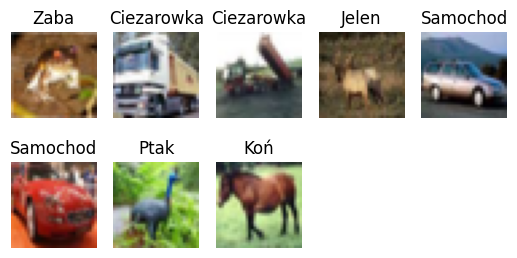

In [36]:
cifar10_class_names = {
    0: "Samolot",
    1: "Samochod",
    2: "Ptak",
    3: "Kot",
    4: "Jelen",
    5: "Pies",
    6: "Zaba",
    7: "Koń",
    8: "Lódź",
    9: "Ciezarowka",
}


def print_cifar_sample(image_count: int) -> None:
    """Print image_count of images form the dataset"""
    # Load entire data set
    (x_train, y_train), _ = cifar10.load_data()
    # Loop through each picture in the data set
    for i in range(image_count):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(x_train[i])
        # Get image's expected class id
        image_class_number = y_train[i][0]
        # Get class name from the class id
        image_class_name = cifar10_class_names[image_class_number]

        plt.title(image_class_name)
        plt.axis("off")


print_cifar_sample(8)

In [43]:
gpu = tf.config.list_physical_devices('GPU')
if gpu:
    print("gpu")
    tf.config.experimental.set_memory_growth(gpu[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
gpu


In [41]:

with tf.device('/cpu:0'):
    pass

Metal device set to: Apple M1 Max


2023-01-18 12:59:25.250866: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-18 12:59:25.251044: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
import matplotlib.pyplot as plt

(x_train, y_train), _ = cifar10.load_data()

plt.figure(figsize=(10, 10))
for images, labels in x_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


TypeError: 'numpy.uint8' object is not iterable

<Figure size 1000x1000 with 0 Axes>

In [6]:
from keras.utils import array_to_img

path_image = "/Users/mc/Downloads/cat-2083492_960_720.jpg"

img = tf.io.read_file(path_image)
img = tf.io.decode_image(img, channels=3)
resize_image = tf.image.resize(img, [32, 32])

to_img = array_to_img(resize_image)
to_img.show()